# Black Friday Sale Data Analysis & Prediction

**Importing Libraries**

In [1]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

**Loading dataset**

In [2]:
df=pd.read_csv('train.csv')
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.shape

(550068, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


**Null Value Detection**

In [54]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

**Missing Value Handling**

In [3]:
data_median_Category_2 = df['Product_Category_2'].median()
data_median_Category_3 = df['Product_Category_3'].median()

In [4]:
df = df.fillna(data_median_Category_2)
df = df.fillna(data_median_Category_3)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,9.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,9.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,9.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,9.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.0,9.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.0,9.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.0,9.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.0,9.0,365


In [5]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [57]:
#dropping irrelevant column
df = df.drop(["User_ID","Product_ID"],axis=1)

**Duplication Check**

In [27]:
df.duplicated().sum()

0

## Outlier Detection

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
Upper_Whisker = Q3 + 1.5 * IQR
Lower_Whisker = Q1 - 1.5 * IQR
outlier = ((df < Lower_Whisker)|(df > Upper_Whisker))
print('Number of outliers in all columns')
print('---------------------------------')
outlier.sum()

C:\Users\dafin\AppData\Local\Temp\ipykernel_3764\1952673652.py:1: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\dafin\AppData\Local\Temp\ipykernel_3764\1952673652.py:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\dafin\AppData\Local\Temp\ipykernel_3764\1952673652.py:6: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



Number of outliers in all columns
---------------------------------


Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1              4153
Product_Category_2                 0
Product_Category_3            155242
Product_ID                         0
Purchase                        2677
Stay_In_Current_City_Years         0
User_ID                            0
dtype: int64

<AxesSubplot: xlabel='Purchase'>

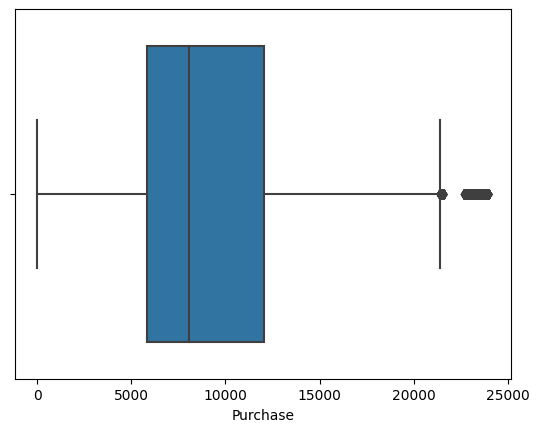

In [13]:
sns.boxplot(x=df["Purchase"])

In [7]:
df.loc[:, 'Product_Category_1'] = df.loc[:, 'Product_Category_1'][(df.loc[:, 'Product_Category_1'] >= df.loc[:, 'Product_Category_1'].quantile(0.1)) & (df.loc[:, 'Product_Category_1'] <= df.loc[:, 'Product_Category_1'].quantile(0.9))]
df.loc[:, 'Product_Category_3'] = df.loc[:, 'Product_Category_3'][(df.loc[:, 'Product_Category_3'] >= df.loc[:, 'Product_Category_3'].quantile(0.1)) & (df.loc[:, 'Product_Category_3'] <= df.loc[:, 'Product_Category_3'].quantile(0.9))]
df.loc[:, 'Purchase'] = df.loc[:, 'Purchase'][(df.loc[:, 'Purchase'] >= df.loc[:, 'Purchase'].quantile(0.1)) & (df.loc[:, 'Purchase'] <= df.loc[:, 'Purchase'].quantile(0.9))]

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
Upper_Whisker = Q3 + 1.5 * IQR
Lower_Whisker = Q1 - 1.5 * IQR
outlier = ((df < Lower_Whisker)|(df > Upper_Whisker))
print('Number of outliers after Outlier Treatment')
print('------------------------------------------')
outlier.sum()

C:\Users\dafin\AppData\Local\Temp\ipykernel_3764\1139951727.py:1: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\dafin\AppData\Local\Temp\ipykernel_3764\1139951727.py:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\dafin\AppData\Local\Temp\ipykernel_3764\1139951727.py:6: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



Number of outliers after Outlier Treatment
------------------------------------------


Age                               0
City_Category                     0
Gender                            0
Marital_Status                    0
Occupation                        0
Product_Category_1                0
Product_Category_2                0
Product_Category_3            64677
Product_ID                        0
Purchase                          0
Stay_In_Current_City_Years        0
User_ID                           0
dtype: int64

<AxesSubplot: xlabel='Purchase'>

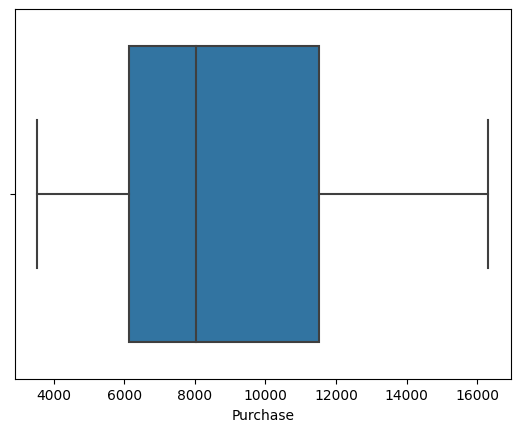

In [15]:
sns.boxplot(x=df["Purchase"])

In [125]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3.0,9.0,9.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,NaN,9.0,9.0,NaN
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,NaN,14.0,9.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8.0,9.0,9.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,Married,NaN,9.0,9.0,NaN
550064,1006035,P00375436,F,26-35,1,C,3,Unmarried,NaN,9.0,9.0,NaN
550065,1006036,P00375436,F,26-35,15,B,4+,Married,NaN,9.0,9.0,NaN
550066,1006038,P00375436,F,55+,1,C,2,Unmarried,NaN,9.0,9.0,NaN


## EDA

**Seaborn**

**1. Distribution of Purchase Amount**

C:\Users\sweth\AppData\Local\Temp\ipykernel_17596\897564917.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




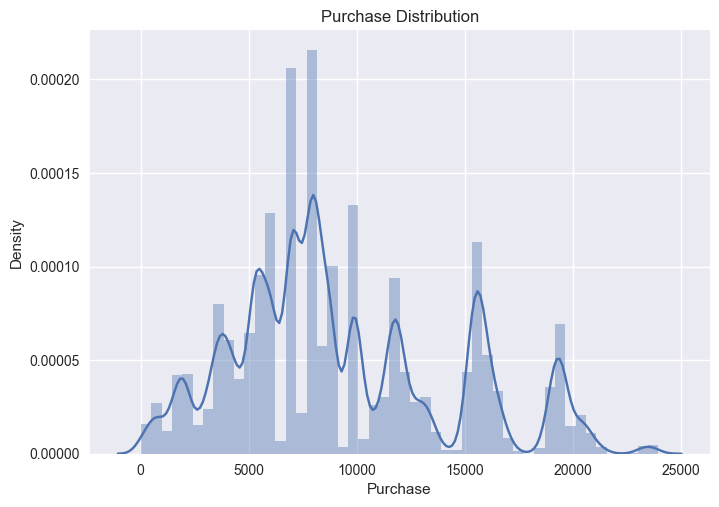

In [72]:
sns.distplot(df["Purchase"])
plt.title("Purchase Distribution")
plt.show()

We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution

**2. Purchase by Marital Status**

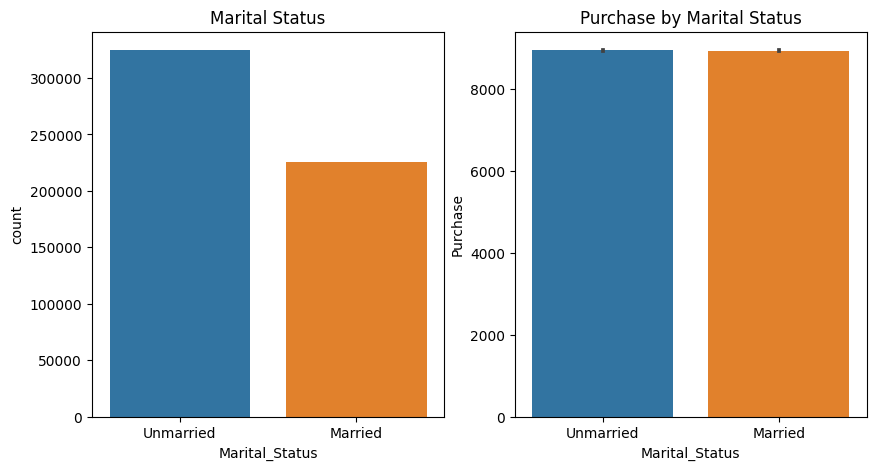

In [17]:
df['Marital_Status'] = df['Marital_Status'].map({0: 'Unmarried', 1: 'Married'})

# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Create a count plot of the "Marital_Status" column in the first subplot
sns.countplot(x='Marital_Status', data=df, ax=axs[0])
axs[0].set_title('Marital Status')

# Create a bar plot of the "Purchase" column grouped by "Marital_Status" in the second subplot
sns.barplot(x="Marital_Status", y="Purchase", data=df, ax=axs[1])
axs[1].set_title('Purchase by Marital Status')

# Display the plots
plt.show()

This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

**3. Product Purchase by Occupation**

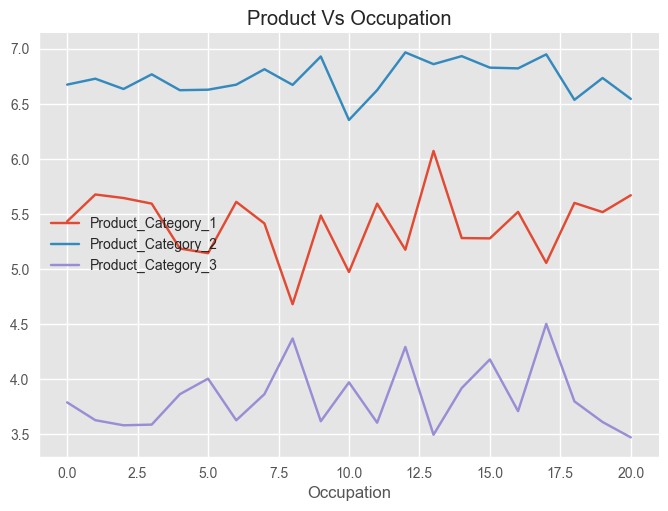

In [76]:
df.groupby(["Occupation"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.line(title="Product Vs Occupation")
sns.despine()

### Matplotlib

**4. Distribution of Customer's Likelihood to Stay in Current City**

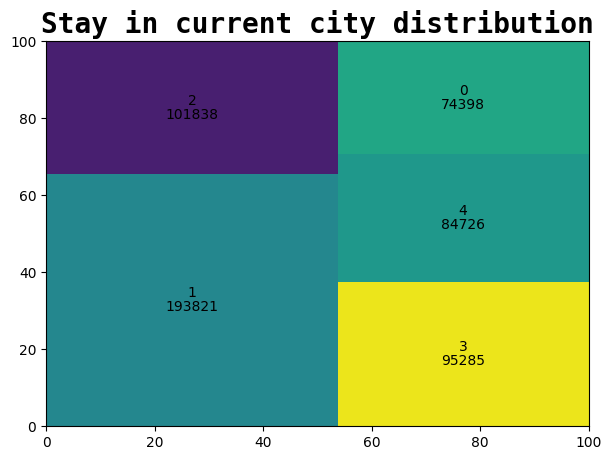

In [80]:
# Creating a Treemap for 'Stay_In_Current_City_Years'
stay = df['Stay_In_Current_City_Years'].value_counts()

import squarify
plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = stay.values, label = stay.index, value = stay.values)
plt.title('Stay in current city distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

**5. Sales by City**

In [40]:
df['Marital_Status'] = df['Marital_Status'].map({'Unmarried': 0, 'Married': 1})

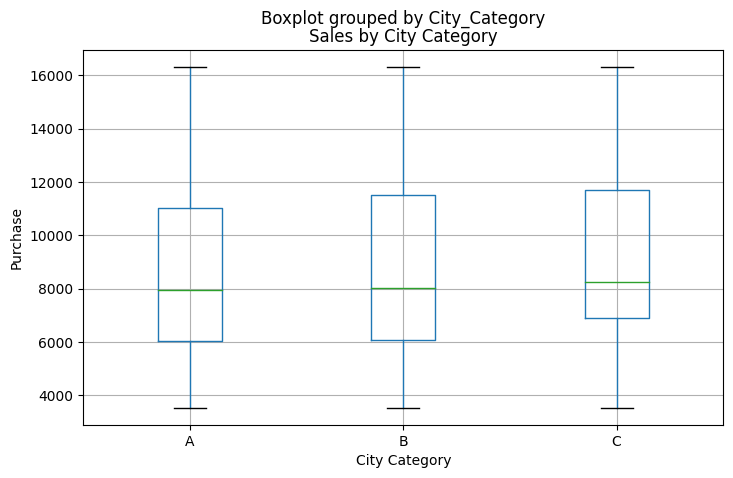

In [47]:
# Create a box plot of Sales by City_Category
df.boxplot(column='Purchase', by='City_Category', figsize=(8,5))

plt.title('Sales by City Category')
plt.xlabel('City Category')
plt.ylabel('Purchase')

plt.show()

**6. Distribution of City Category**

C:\Users\sweth\AppData\Local\Temp\ipykernel_17596\1409113156.py:4: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



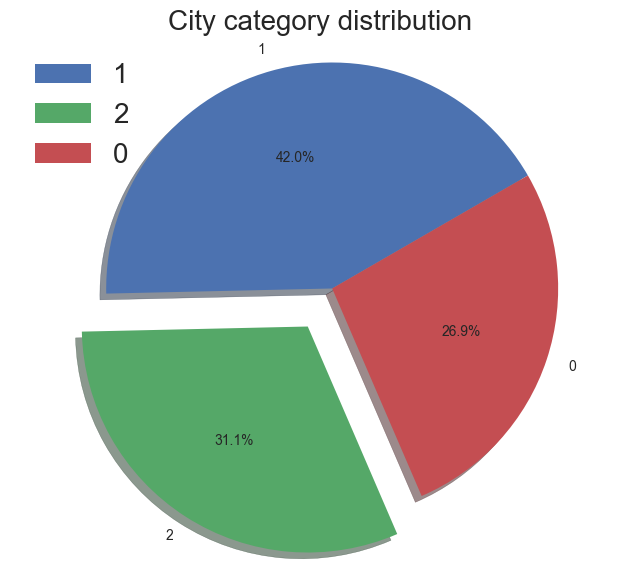

In [71]:
# Creating a pie chart for 'City Category'
city = df['City_Category'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize = (8, 7))
plt.pie(city.values, labels = city.index, startangle = 30, explode = (0 , 0.20, 0), shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution', fontdict = {'fontsize' : 20})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

**7. Most consumed product by city**

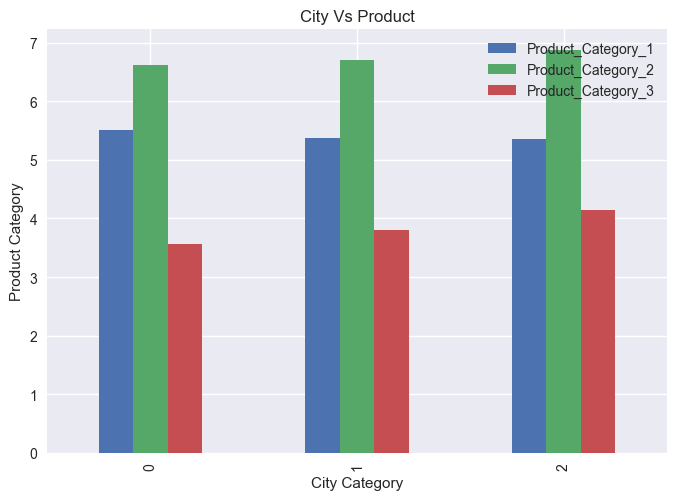

In [70]:
grouped_df = df.groupby(["City_Category"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]]
ax = grouped_df.plot(kind="bar", title="City Vs Product")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlabel("City Category")
plt.ylabel("Product Category")
plt.show()

the 2`nd product category was most consumed in the all of the city groupes.

**8. Age Distribution**

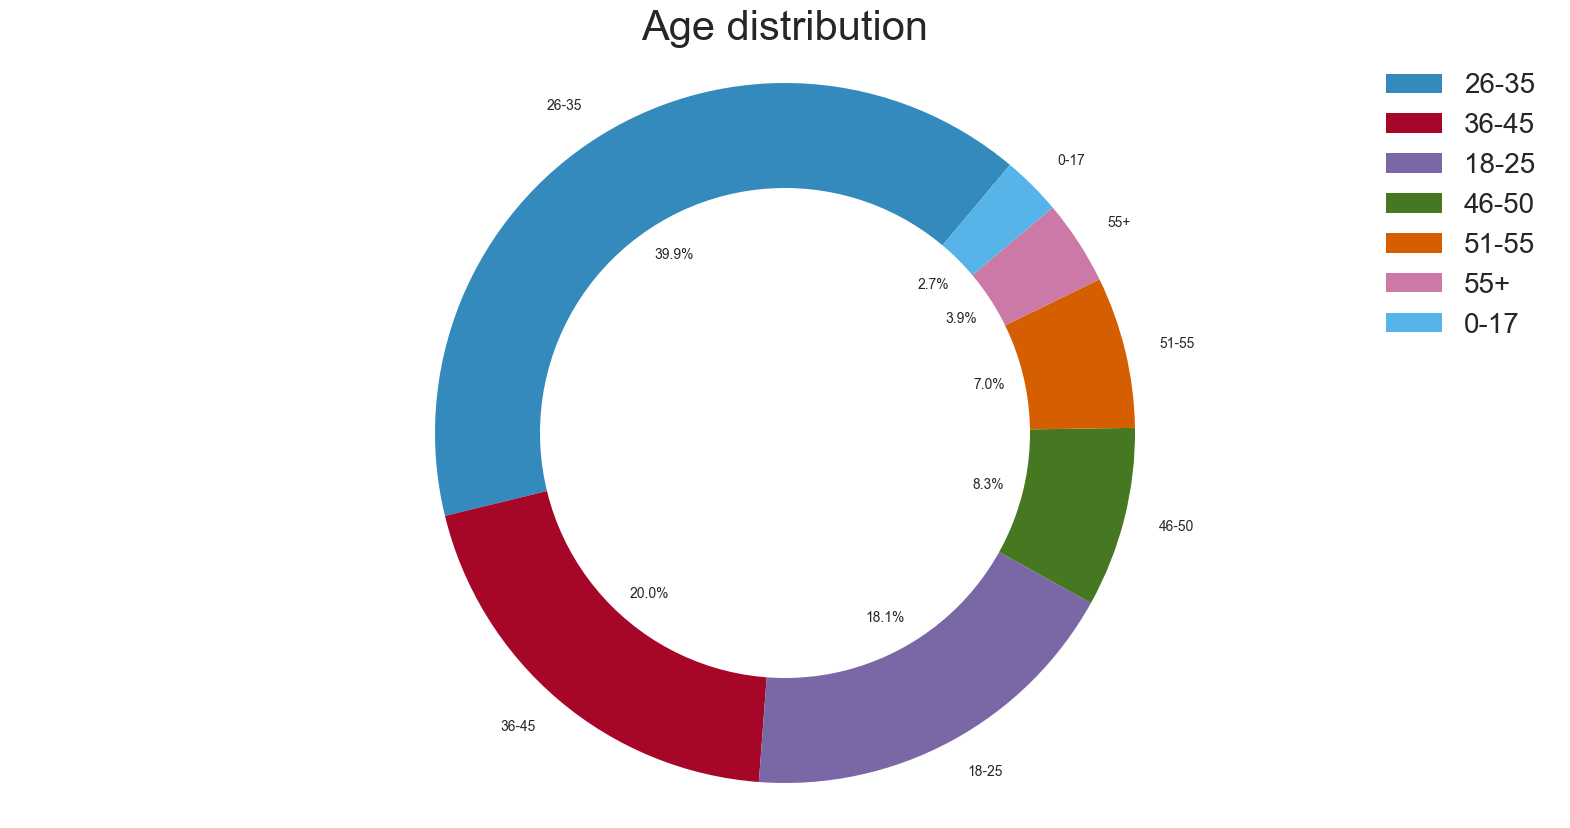

In [30]:
# Creating a donut chart for 'Age'
age = df['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontsize' : 30})
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()

### Plotly

**9. Stay-wise Purchase Distribution**

In [10]:
totalPurchase = df.Purchase.sum()

In [9]:
labels = sorted(df.Stay_In_Current_City_Years.unique())
values = df.Stay_In_Current_City_Years.value_counts().sort_index()

trace = go.Pie(labels=labels, values=values)

iplot([trace])

**10. Product Sold by Age**

In [11]:
ageData = sorted(list(zip(df.Age.value_counts().index, df.Age.value_counts().values)))
age, productBuy = zip(*ageData)
age, productBuy = list(age), list(productBuy)
ageSeries = pd.Series((i for i in age))

data = [go.Bar(x=age, 
               y=productBuy, 
               name="How many products were sold",
               marker = dict(color=['#EA4A28', '#D3EA28', '#28EA4E', '#28EAE2', '#2008B9', '#E511E1', '#C4061D'],
                            line = dict(color='#7C7C7C', width = .5)),
              text="Age: " + ageSeries)]
layout = go.Layout(title= "How many products were sold by ages")
fig = go.Figure(data=data, layout=layout)
iplot(fig)

people between the ages of 26-35 tend to buy more products and spend more money. This could be explained by their financial status, as they are likely to have a higher income compared to younger individuals. Additionally, this age group is often more interested in technology and promotions, which could also contribute to their higher purchasing behavior.

**11. Purchase Vs Marital Status and Gender**

In [12]:
x_Status = ['Single & Male', 'Single & Female', 'Married & Male', 'Married & Female']
y_Purchases = [df[(df.Gender == 'M') & (df.Marital_Status == 0)].Purchase.sum(),
              df[(df.Gender == 'F') & (df.Marital_Status == 0)].Purchase.sum(),
              df[(df.Gender == 'M') & (df.Marital_Status == 1)].Purchase.sum(),
              df[(df.Gender == 'F') & (df.Marital_Status == 1)].Purchase.sum()]

data = [go.Bar(x = x_Status, 
                y = y_Purchases,
              marker = dict(color=['rgb(0,212,65)','rgb(54,10,95)','rgb(5,22,205)','rgb(50,62,1)']))]
layout = go.Layout(title = 'Purchased Amount According To Gender and Marital Status (in US Dollars)')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Our findings were contrary to the common belief that single females do the most shopping. Surprisingly, our results showed that single males made the highest number of purchases compared to all other categories. This may be due to their tendency to purchase more electronic gadgets. Additionally, we discovered that the purchase rate of single females was higher than that of married females.

**12. Correlation Map**

C:\Users\sweth\AppData\Local\Temp\ipykernel_17596\2271070662.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



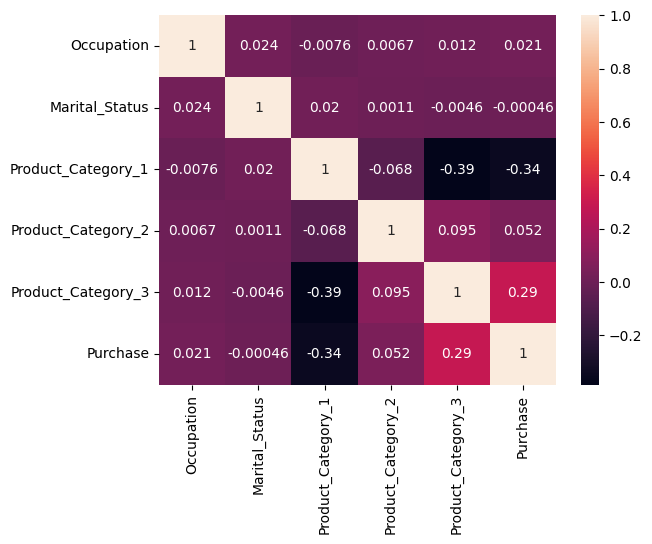

In [58]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## Splitting Dataset

In [81]:
X = df.drop("Purchase",axis=1)
y=df['Purchase']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Random Forest Regressor**

In [83]:
from sklearn.ensemble import RandomForestRegressor
# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)
RFregressor.fit(X_train, y_train)
rf_y_pred = RFregressor.predict(X_test)
mean_absolute_error(y_test, rf_y_pred)

2223.38576209429

In [86]:
mean_squared_error(y_test, rf_y_pred)

9323515.925770475

In [87]:
r2_score(y_test, rf_y_pred)

0.6304769817717517

In [88]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  3053.4432900858787


**XGBoost Regressor**

In [89]:
from xgboost.sklearn import XGBRegressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [90]:
xgb_y_pred = xgb_reg.predict(X_test)
mean_absolute_error(y_test, xgb_y_pred)

2143.895651883683

In [91]:
mean_squared_error(y_test, xgb_y_pred)

8251910.415536889

In [92]:
r2_score(y_test, xgb_y_pred)

0.6729483955221189

In [93]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2872.6138646774107


After 
comparing the performance of both models using evaluation 
metrics such as Mean Absolute Error, Mean Squared Error, 
and Root Mean Squared Error, we found that the **XGBoost 
Regressor model performed better with an RMSE of 2872**, 
compared to the Random Forest Regressor model with an 
RMSE of 3053.